In [1]:
from keras.datasets import mnist
import numpy as np

# Importing the Dataset 
img_dataset = mnist.load_data()
img_dataset = np.asarray(img_dataset) # To convert tuple into the numpy

print("X_train is: ", len(img_dataset[0][0]), "Y_train is: ", len(img_dataset[0][1])) 
print("X_test is: ", len(img_dataset[1][0]), "Y_test is: ", len(img_dataset[1][1]))

Using TensorFlow backend.


X_train is:  60000 Y_train is:  60000
X_test is:  10000 Y_test is:  10000


In [1]:
# We can plot any image using the 2-D input vector pixels that is rows and columns using the Matplotlib library. 

In [2]:
# Dataset description is-----------
# [
#     [X_train], [Y_train]
#     [X_test], [Y_test]
# ]

In [3]:
# Splitting the Image Data into Training and Testing Data
(X_train, Y_train), (X_test, Y_test) = img_dataset
print("Datatype of Data is: ", type(X_train), X_train[0].ndim)

Datatype of Data is:  <class 'numpy.ndarray'> 2


In [4]:
print("------", X_test.shape, "++++++", Y_test.shape)

------ (10000, 28, 28) ++++++ (10000,)


In [18]:
# for i in range(1, 2):
#     print("[", end = "")
#     for j in range(len(X_test[i])):
#         print("[", end = "")
#         for k in range(len(X_test[i][j])):
#             print(X_test[i][j][k], end= " ")
#         print()
#     break  

(28, 28)
Pixel Value-  (28, 28)


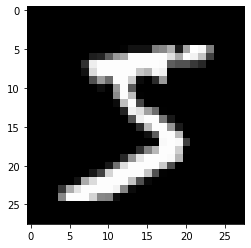

In [20]:
# Visualise the First Image
import matplotlib.pyplot as plt
import numpy as np
first_image = X_train[0]
print(first_image.shape)
print("Pixel Value- ", first_image.shape)
plt.imshow(first_image, cmap='gray')
plt.show()

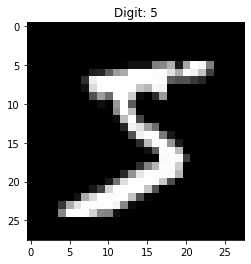

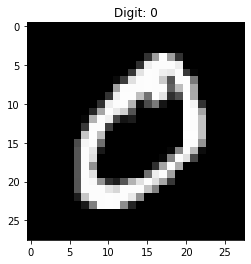

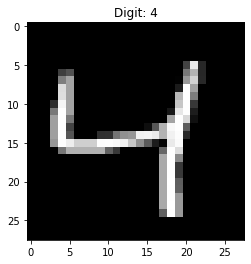

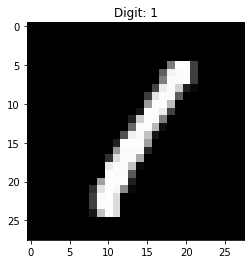

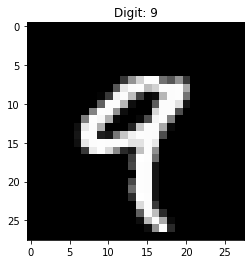

In [21]:
# Showing the Training Data
import matplotlib.pyplot as plt
for img in range(5):
#     plt.subplot(3,3,img+1)
#     plt.tight_layout()
    plt.imshow(X_train[img], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(Y_train[img]))
#     plt.xticks([])
#     plt.yticks([])
    plt.show()

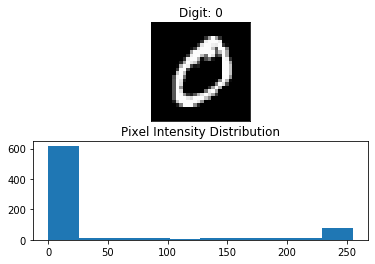

In [22]:
# Showing the Pixel Intensity Distribution of one Image
plt.subplot(2,1,1)
plt.imshow(X_train[1], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(Y_train[1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[1].reshape(784))
plt.title("Pixel Intensity Distribution")
plt.show()

In [23]:
# Building the Training vector from the 28x28 pixels (Converting the 3D Array to 2D Array)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("++++", X_train.shape, "----", X_test.shape)

X_train = X_train / 255
X_test = X_test / 255

++++ (60000, 784) ---- (10000, 784)


In [24]:
# Getting the final Training data
print("Train Data shape", X_train.shape)
print("Test Data shape", X_test.shape)

Train Data shape (60000, 784)
Test Data shape (10000, 784)


In [25]:
import numpy as np
print(np.unique(Y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [26]:
# Applying the one-hot encoding to convert the integer digits to 0-1 array
from keras.utils import np_utils

no_of_classes_to_be_encode = 10
print("First Label Before", Y_train[0], Y_test[0])
print("Train Data Before oneHot Encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, no_of_classes_to_be_encode)

print("First Label After", Y_train[0], Y_test[0])
Y_test = np_utils.to_categorical(Y_test, no_of_classes_to_be_encode)
print("Train Data after oneHot Encoding: ", Y_train.shape)


First Label Before 5 7
Train Data Before oneHot Encoding:  (60000,)
First Label After [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 7
Train Data after oneHot Encoding:  (60000, 10)


In [27]:
# Importing the Keras Library
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Creating a Input and Hidden Layer with the sequential model
classifier = Sequential()
classifier.add(Dense(512, input_shape=(784,)))
classifier.add(Activation('relu'))                            
classifier.add(Dropout(0.2))

classifier.add(Dense(512))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(10))
classifier.add(Activation('softmax'))  # Softmax is used because we have multiple classes to be classified

In [28]:
# Compiling the sequential model
classifier.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Adam optimizer works on the Stochastic Gradient Descent principle

In [29]:
# Training the Model
model_history = classifier.fit(X_train, Y_train,
          batch_size=128, epochs=15,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 8s - loss: 0.2498 - accuracy: 0.9251 - val_loss: 0.1055 - val_accuracy: 0.9681
Epoch 2/15
 - 7s - loss: 0.1006 - accuracy: 0.9689 - val_loss: 0.0721 - val_accuracy: 0.9767
Epoch 3/15
 - 6s - loss: 0.0718 - accuracy: 0.9777 - val_loss: 0.0740 - val_accuracy: 0.9766
Epoch 4/15
 - 6s - loss: 0.0568 - accuracy: 0.9821 - val_loss: 0.0740 - val_accuracy: 0.9780
Epoch 5/15
 - 6s - loss: 0.0475 - accuracy: 0.9845 - val_loss: 0.0651 - val_accuracy: 0.9807
Epoch 6/15
 - 6s - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0635 - val_accuracy: 0.9818
Epoch 7/15
 - 6s - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0694 - val_accuracy: 0.9810
Epoch 8/15
 - 6s - loss: 0.0309 - accuracy: 0.9895 - val_loss: 0.0711 - val_accuracy: 0.9804
Epoch 9/15
 - 6s - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0642 - val_accuracy: 0.9820
Epoch 10/15
 - 6s - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0652 - val_accuracy: 0.9834
Epoch 11/15
 - 6s -

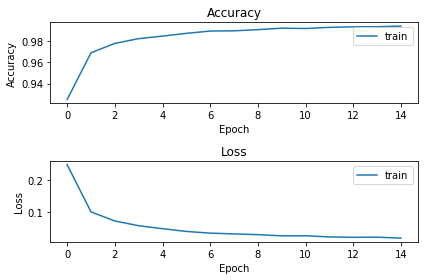

In [30]:
# Plotting the Accuracy and Loss of Model
plt.subplot(2,1,1)
plt.plot(model_history.history['accuracy'])

# Accuracy
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'])

# Loss
plt.subplot(2,1,2)
plt.plot(model_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'])

plt.tight_layout()

In [31]:
# Model Evaluation
metrics = classifier.evaluate(X_test, Y_test, verbose=2)

print("Loss of Model(%)- ", metrics[0] * 100)
print("Accuracy of Model(%)- ", metrics[1] * 100)

Loss of Model(%)-  6.939915865107505
Accuracy of Model(%)-  98.48999977111816


In [32]:
# Save Model on the Disk

# serialize model to JSON
classifier_json = classifier.to_json()
with open('classifier.json', 'w') as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
classifier.save_weights("classifier.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
# Retrieving the Saved Model
from keras.models import model_from_json

# load json and create model
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("classifier.h5")
print("Loaded model from disk")

Loaded model from disk


In [34]:
# Predict the test Data
predicted_values = classifier.predict_classes(X_test)
print("Predicted values are- ", predicted_values)

correct_results = []
incorrect_results = []

for i in range(len(predicted_values)):
    count = 0
    for j in range(10):
        if Y_test[j] is not 0 and predicted_values[i] == j:
#             print("Correct and I = ", i, predicted_values[i], Y_test[i])
            correct_results.append(predicted_values[i])
            break
        else:
            count += 1
            continue

    if count == 10:
#         print("InCorrect and I = ", i, predicted_values[i], Y_test[i])
        incorrect_results.append(predicted_values[i])

print(len(correct_results)," are classified correctly")
print(len(incorrect_results)," are classified incorrectly")

Predicted values are-  [7 2 1 ... 4 5 6]
10000  are classified correctly
0  are classified incorrectly


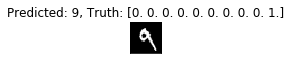

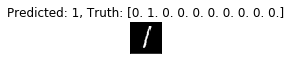

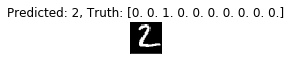

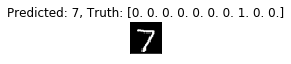

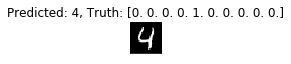

In [35]:
# Plot the first Five Correct Predictions
for i, correct in enumerate(correct_results[:5]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(predicted_values[correct], Y_test[correct]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [36]:
# Plot First Five Incorrect predictions
for i, incorrect in enumerate(incorrect_results[:5]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Truth: {}".format(predicted_values[incorrect], Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [37]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
Y_pred = classifier.predict_classes(img_flatten)
Y_pred[0]

7

In [97]:
# Creating a function to get the Digit
def getDigit(result):
    prediction = 0
    for val in range(len(result)):
        if int(result[val]) == int(1.0):
            prediction = val
        else:
            continue
            
    return prediction

In [101]:
# Converting the Image into Desired Format
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def getImagePredict(img_name):
    org_image = image.load_img(img_name, target_size = (28, 28), color_mode = "grayscale")   # Load the Image
    test_image = image.img_to_array(org_image)    # Convert Image to Array to 3D array 
    # print(test_image.shape, X_test[0].shape)
    test_image = test_image.reshape(1, 784)       # Reshaping the Image
    # print(test_image.shape)
    
    result = classifier.predict(test_image)       # Predicting the Digit
    result = result[0]
    # print(result)

    answer = getDigit(result)            # Associating the Label with the 1
    
    plt.xticks([])              # Visualising the Image with Label
    plt.yticks([])
    plt.title("It is  {}".format(answer))     
    plt.show(plt.imshow(org_image))

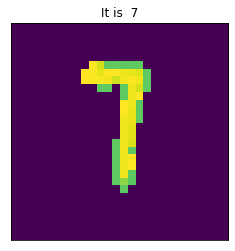

In [103]:
# Making a new prediction
getImagePredict('SevenLatest.png')    # Calling the Function

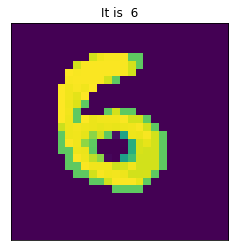

In [104]:
# Making a new prediction
getImagePredict('SixLatest.png')    # Calling the Function

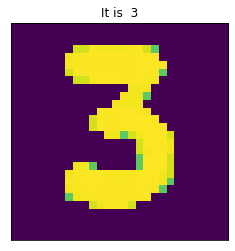

In [106]:
# Making a new prediction
getImagePredict('ThreeLatest.png')    # Calling the Function